### Project requirements:

Use measurements of Iris flowers (setosa, versicolor, virginica) as input data.

● Train a machine learning model to classify the species based on these measurements.

● Use libraries like Scikit-learn for easy dataset access and model building.

● Evaluate the model’s accuracy and performance using test data.

● Understand basic classification concepts in machine learning.

## Step 1: 'Importing Necessary Libraries'

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Step 2: 'Load and Explore the Dataset'

In [2]:
# Load the dataset
df = pd.read_csv('Iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Displaying dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [4]:
# Displaying basic statistics
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [5]:
# Checking for missing values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Checking class distribution
print("Class Distribution:")
print(df['Species'].value_counts())

Class Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## Step 3: 'Data Visualizations'

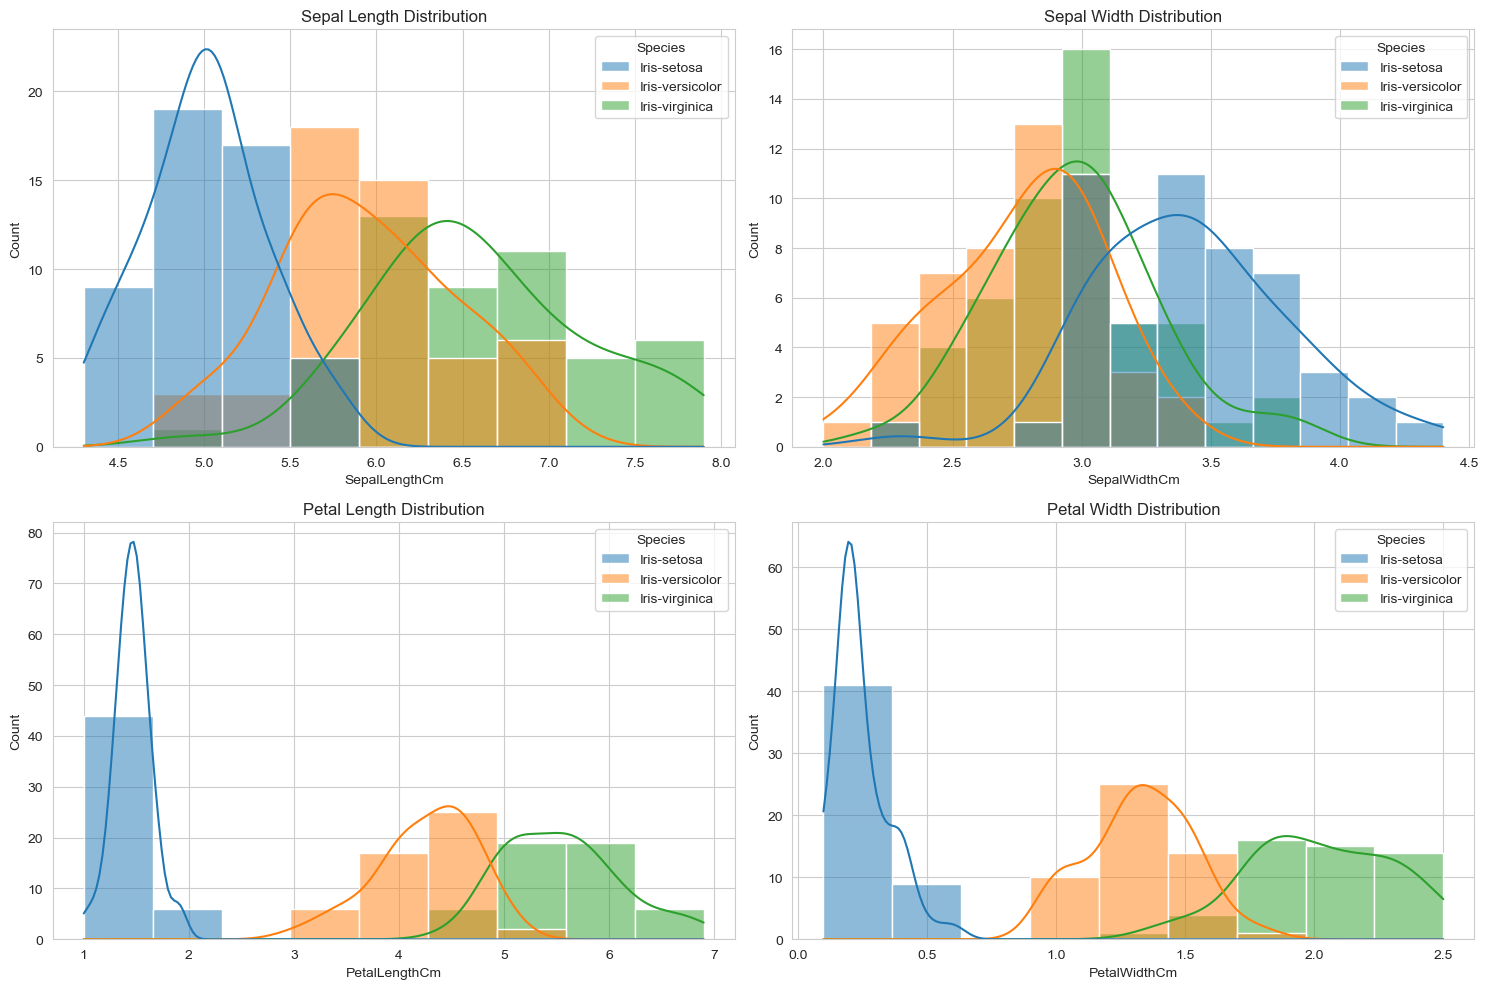

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Sepal Length
sns.histplot(data=df, x='SepalLengthCm', hue='Species', kde=True, ax=axes[0,0])
axes[0,0].set_title('Sepal Length Distribution')

# Plot 2: Sepal Width
sns.histplot(data=df, x='SepalWidthCm', hue='Species', kde=True, ax=axes[0,1])
axes[0,1].set_title('Sepal Width Distribution')

# Plot 3: Petal Length
sns.histplot(data=df, x='PetalLengthCm', hue='Species', kde=True, ax=axes[1,0])
axes[1,0].set_title('Petal Length Distribution')

# Plot 4: Petal Width
sns.histplot(data=df, x='PetalWidthCm', hue='Species', kde=True, ax=axes[1,1])
axes[1,1].set_title('Petal Width Distribution')

plt.tight_layout()
plt.show()

## Step 4: 'Data Preprocessing'

In [8]:
# Drop the 'Id' column as it's not needed for prediction
df = df.drop('Id', axis=1)

# Encode the target variable (convert species names to numbers)
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# Display the mapping
print("Species Encoding:")
for i, species in enumerate(label_encoder.classes_):
    print(f"{species}: {i}")
print("\n")

# Separating features (X) and target (y)
X = df.drop('Species', axis=1)  # Features
y = df['Species']  # Target

Species Encoding:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2




## Step 5: 'Split Data into Training and Testing Sets'

In [10]:
# Splitting the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\n")


Training set size: 120
Testing set size: 30




## Step 6: 'Train the Machine Learning Model'

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed!")
print("\n")

Model training completed!




## Step 7: 'Make Predictions and Evaluate the Model'

Model Accuracy: 90.00%


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


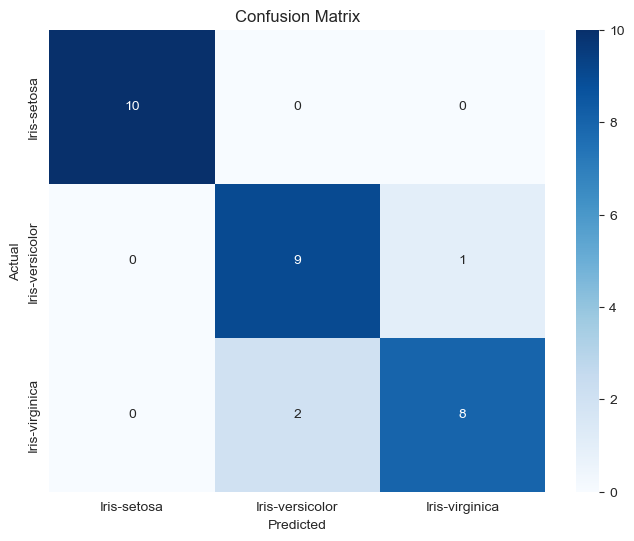

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\n")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Step 8: 'Save and Load the Model'

In [15]:
import joblib
joblib.dump(model, 'iris_classifier.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model saved successfully!")

# To load and use the model later:
# loaded_model = joblib.load('iris_classifier.pkl')
# loaded_encoder = joblib.load('label_encoder.pkl')

Model saved successfully!
